In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("/traffic.csv")
df.head()

,Time,No of vehicles
0,0,9.0
1,1,6.0
2,2,9.0
3,3,8.0
4,4,11.0


In [24]:
x=df["Time"].values
y=df["No of vehicles"].values

In [9]:
# Function to calculate Lagrange polynomial
def lagrange_poly(x, y):
    n = len(x)
    p = np.poly1d(0.0)
    for i in range(n):
        L = np.poly1d(y[i]) 
        for j in range(n):
            if j != i:
                L *= np.poly1d([1.0, -x[j]]) / (x[i] - x[j])
        p += L
    return p

# Calculate Lagrange polynomial
p = lagrange_poly(x[0:7], y[0:7])
print(p)

         6         5         4      3         2
0.07778 x - 1.433 x + 10.03 x - 33 x + 50.89 x - 29.57 x + 9


In [12]:
No_of_vehicles=p(3.5) # vehicles at 3.5 hours

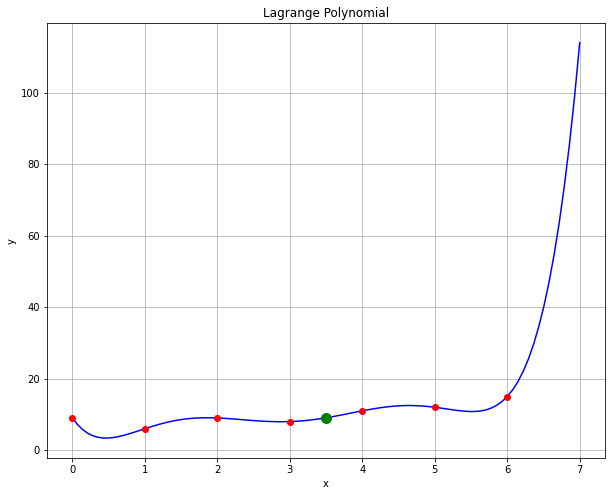

In [22]:
# Plot the Lagrange Polynomial and the data points
x_new = np.linspace(0, 7, 100)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, p(x_new), 'b',x[0:7], y[0:7], 'ro')
plt.plot(3.5, No_of_vehicles, 'go', markersize=10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [33]:
import numpy as np
def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F
def newton_div_dif_poly(x,y):
   F=divided_difference_table(x,y) # Saving divided difference in a variable F
   n=len(x)
   prod=np.poly1d(1)
   N=np.poly1d(F[0][0])
   for i in range(1,n):
     prod=np.poly1d(x[0:i],True)
     N+=np.poly1d(F[i][i]*(prod.c))
     
  
   
   return N


N=newton_div_dif_poly(x[0:7], y[0:7])

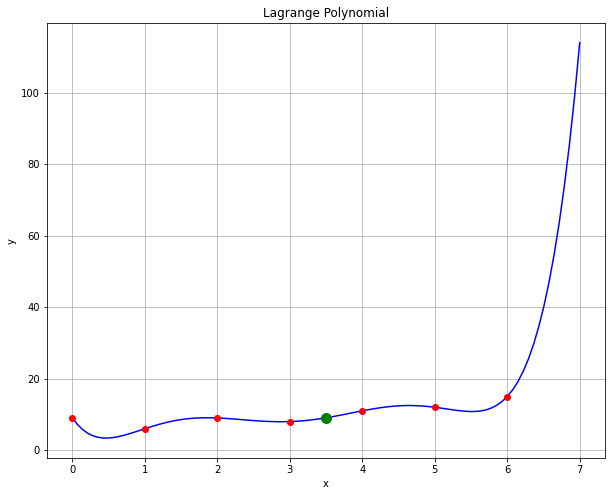

In [34]:
# Plot the Lagrange Polynomial and the data points
x_new = np.linspace(0, 7, 100)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, N(x_new), 'b',x[0:7], y[0:7], 'ro')
plt.plot(3.5, No_of_vehicles, 'go', markersize=10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
